In [1]:
import theano
device="gpu0"

import keras
import cPickle
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
import root_numpy as rn

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)
Using Theano backend.


Couldn't import dot_parser, loading of dot files will not be possible.


Welcome to ROOTaaS 6.06/04


In [2]:
theano.config.device


'gpu0'

In [3]:
def show_losses( histories ):
    plt.figure(figsize=(10,10))
    #plt.ylim(bottom=0)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Error by Epoch')
    colors=[]
    do_acc=False
    for label,loss in histories:
        color = tuple(np.random.random(3))
        colors.append(color)
        l = label
        vl= label+" validation"
        if 'acc' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['acc'][-1])
            do_acc = True
        if 'val_acc' in loss.history:
            vl+=' (acc %2.4f)'% (loss.history['val_acc'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color=color)
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color=color)


    plt.legend()
    plt.yscale('log')
    plt.show()
    if not do_acc: 
	return
    plt.figure(figsize=(10,10))
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    for i,(label,loss) in enumerate(histories):
        color = colors[i]
        if 'acc' in loss.history:
            plt.plot(loss.history['acc'], lw=2, label=label+" accuracy", color=color)
        if 'val_acc' in loss.history:
            plt.plot(loss.history['val_acc'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(loc='lower right')
    plt.show()


In [4]:

N=5

# Load the dataset
f = open('/home/kaustuv1993/Data/mnist.pkl', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()
train_data, train_target = train_set
test_data, test_target = test_set

train_data = train_data[np.where(train_target<N)[0],...]
train_target = train_target[np.where(train_target<N)]
test_data = test_data[np.where(test_target<N)[0],...]
test_target = test_target[np.where(test_target<N)]

train_target_N = np.zeros((train_target.shape[0], N))
test_target_N = np.zeros((test_target.shape[0], N))
for number in range(N):
    train_target_N[np.where(train_target==number),number] = 1
    test_target_N[np.where(test_target==number),number] = 1

train_data_sq = train_data.reshape( (train_data.shape[0], 1,28,28 ) )
test_data_sq = test_data.reshape( (test_data.shape[0], 1, 28,28 ) )

train_target.shape
test_target.shape

(5139,)

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

the target is 0
[ 1.  0.  0.  0.  0.]


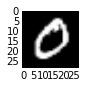

the target is 4
[ 0.  0.  0.  0.  1.]


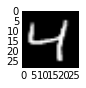

the target is 1
[ 0.  1.  0.  0.  0.]


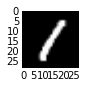

the target is 2
[ 0.  0.  1.  0.  0.]


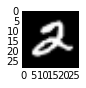

the target is 1
[ 0.  1.  0.  0.  0.]


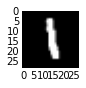

the target is 3
[ 0.  0.  0.  1.  0.]


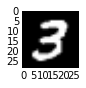

the target is 1
[ 0.  1.  0.  0.  0.]


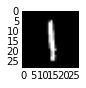

the target is 4
[ 0.  0.  0.  0.  1.]


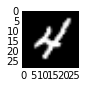

the target is 3
[ 0.  0.  0.  1.  0.]


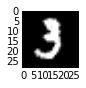

the target is 3
[ 0.  0.  0.  1.  0.]


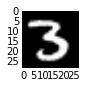

the target is 1
[ 0.  1.  0.  0.  0.]


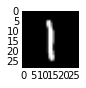

the target is 2
[ 0.  0.  1.  0.  0.]


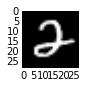

the target is 4
[ 0.  0.  0.  0.  1.]


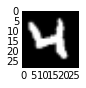

the target is 0
[ 1.  0.  0.  0.  0.]


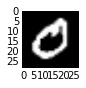

the target is 1
[ 0.  1.  0.  0.  0.]


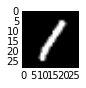

the target is 1
[ 0.  1.  0.  0.  0.]


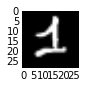

the target is 2
[ 0.  0.  1.  0.  0.]


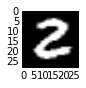

the target is 4
[ 0.  0.  0.  0.  1.]


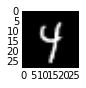

the target is 3
[ 0.  0.  0.  1.  0.]


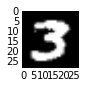

the target is 2
[ 0.  0.  1.  0.  0.]


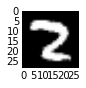

____________________________________________________________________________________________________
Layer (type)                       Output Shape        Param #     Connected to                     
dense_1 (Dense)                    (None, 1000)        785000      dense_input_1[0][0]              
____________________________________________________________________________________________________
dense_2 (Dense)                    (None, 5)           5005        dense_1[0][0]                    
____________________________________________________________________________________________________
activation_1 (Activation)          (None, 5)           0           dense_2[0][0]                    
Total params: 790005
____________________________________________________________________________________________________


In [6]:
for inum in range( 20):
    plt.figure(figsize=(1,1))
    plt.imshow( train_data_sq[inum,0,...], cmap='Greys_r' )
    print "the target is",train_target[inum]
    print train_target_N[inum]
    plt.show()

activation='sigmoid'

simple = Sequential()
simple.add(Dense(1000, input_dim=28*28, activation=activation))
simple.add(Dense(N, init='uniform'))
simple.add(Activation('softmax'))
simple.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

simple.summary()


In [ ]:
hist = simple.fit( train_data, train_target_N, nb_epoch=50, batch_size=100 ,verbose=1, validation_split=0.2)

show_losses( [("cat x entropy", hist)])

Train on 20430 samples, validate on 5108 samples
Epoch 1/50
16500/20430 [=======================>......] - ETA: 1s - loss: 0.1288 - acc: 0.9626

In [ ]:
simple = Sequential()
simple.add(Dense(1000, input_dim=28*28, activation="relu"))
simple.add(Dense(N, init='uniform'))
simple.add(Activation('softmax'))
simple.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=['accuracy'])

simple.summary()

In [ ]:
hist = simple.fit( train_data, train_target_N, nb_epoch=50, batch_size=100 ,verbose=1, validation_split=0.2)

show_losses( [("cat x entropy", hist)])

In [3]:
import numpy as np
arr = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
arr

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [4]:
arr = np.delete(arr,1,1)
arr

array([[ 1,  3,  4],
       [ 5,  7,  8],
       [ 9, 11, 12]])